# Generate Average Transition Duration
This notebook visualizes transition from one state to another based on Continuous Time Markov Chain

## Step 1: Load the data

### Load duration data
Load duration data, containing start time `s_time` and end time `e_time`

In [1]:
import os
import glob
import pandas as pd


In [2]:
COURSE_NAME = 'EE101J'
ENROLLMENT_MODE = 'audit'
CTMC_GRAPH_TITLE = 'CTMC State Transitions Over Time for '+ENROLLMENT_MODE + ' Users in '+COURSE_NAME 
GRAPH_COLOR = 'skyblue'

duration_path_pattern = os.path.join('course_data', COURSE_NAME, 'duration', ENROLLMENT_MODE, '*.csv')
duration_paths = glob.glob(duration_path_pattern)


In [3]:
duration_paths

['course_data/EE101J/duration/audit/EE101J_duration_details_2021.csv',
 'course_data/EE101J/duration/audit/EE101J_duration_details_2023.csv',
 'course_data/EE101J/duration/audit/EE101J_duration_details_2022.csv']

In [4]:
duration_df = pd.concat([pd.read_csv(f) for f in duration_paths], ignore_index=True)

### Load activity data

In [5]:
activity_path_pattern = os.path.join('course_data', COURSE_NAME, 'csv_event', '*.csv')
activity_paths = glob.glob(activity_path_pattern)

activity_paths

['course_data/EE101J/csv_event/student_event_2023_EE101J.csv',
 'course_data/EE101J/csv_event/student_event_2021_EE101J.csv',
 'course_data/EE101J/csv_event/student_event_2022_EE101J.csv']

In [6]:
activity_df = pd.concat([pd.read_csv(f) for f in activity_paths], ignore_index=True)

/var/folders/hq/mr_d9f8x11dfzc_f03z9xzbw0000gn/T/ipykernel_74747/2342198758.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  activity_df = pd.concat([pd.read_csv(f) for f in activity_paths], ignore_index=True)


## Expand start time and end time

In [7]:
import ast
# Convert list-like strings to actual lists
def safe_eval(value):
    """Safely evaluate list-like string values into Python lists."""
    return ast.literal_eval(value) if isinstance(value, str) and value.startswith("[") else value


In [8]:
duration_df["s_time"] = duration_df["s_time"].apply(safe_eval)
duration_df["e_time"] = duration_df["e_time"].apply(safe_eval)
duration_df_exploded = duration_df.explode(['s_time', 'e_time'])

print(duration_df_exploded.head(5))

   Unnamed: 0                                  username  \
0           0  0025313717d8cc2f4d3f5635fa4be5932ce4dfa6   
1           2  0025313717d8cc2f4d3f5635fa4be5932ce4dfa6   
1           2  0025313717d8cc2f4d3f5635fa4be5932ce4dfa6   
2           9  0025313717d8cc2f4d3f5635fa4be5932ce4dfa6   
3          10  0025313717d8cc2f4d3f5635fa4be5932ce4dfa6   

                                 id  \
0  05a8f4d1e38243cdb052eee954b7a403   
1  0bbd93b608b447818a544a20416e2572   
1  0bbd93b608b447818a544a20416e2572   
2  5dbb432a16834eb1a56cb03ec3e448ab   
3  65cccf6a4c174d2aac0a478ee1cd36e2   

                                      duration  \
0                                  [0.0002794]   
1  [0.0005636833333333333, 0.9130743333333334]   
1  [0.0005636833333333333, 0.9130743333333334]   
2                         [2.7021488666666666]   
3                       [0.014088633333333333]   

                             e_time                            s_time   type  \
0  2021-08-01T07:47:44.736076

## Group by username, id to get session timeframes

In [9]:
timeframes = duration_df_exploded.groupby(['username', 'id']).agg(
    start_time=('s_time', 'min'),
    end_time=('e_time', 'max')
).reset_index()

timeframes

,username,id,start_time,end_time
0,0005de4615ec64cda7e99baee116cabe660793f1,0bbd93b608b447818a544a20416e2572,2023-07-22T14:40:50.509805+00:00,2023-07-22T14:45:39.166487+00:00
1,0005de4615ec64cda7e99baee116cabe660793f1,5dbb432a16834eb1a56cb03ec3e448ab,2023-07-22T14:39:02.525550+00:00,2023-07-22T14:48:11.428518+00:00
2,0005de4615ec64cda7e99baee116cabe660793f1,65cccf6a4c174d2aac0a478ee1cd36e2,2023-07-22T14:39:02.475764+00:00,2023-07-22T14:48:11.464167+00:00
3,0005de4615ec64cda7e99baee116cabe660793f1,c3d49669f323435b8a2b54e0e9008375,2023-07-22T14:40:50.550855+00:00,2023-07-22T14:45:27.721013+00:00
4,0025313717d8cc2f4d3f5635fa4be5932ce4dfa6,05a8f4d1e38243cdb052eee954b7a403,2021-08-01T07:47:44.719312+00:00,2021-08-01T07:47:44.736076+00:00
...,...,...,...,...
18122,fffcea6da2af167fef8e1bfbd383401a6be63c83,0bbd93b608b447818a544a20416e2572,2022-12-20T14:30:06.087272+00:00,2022-12-20T14:31:18.544558+00:00
18123,fffcea6da2af167fef8e1bfbd383401a6be63c83,5dbb432a16834eb1a56cb03ec3e448ab,2022-12-20T14:29:22.790726+00:00,2022-12-20T14:29:42.237878+00:00
18124,fffcea6da2af167fef8e1bfbd383401a6be63c83,65cccf6a4c174d2aac0a478ee1cd36e2,2022-12-20T14:29:22.760041+00:00,2022-12-20T14:31:25.322733+00:00
18125,fffcea6da2af167fef8e1bfbd383401a6be63c83,7cfd0818012547ae8ebe167ad7392145,2022-12-20T14:30:50.572593+00:00,2022-12-20T14:30:51.767319+00:00


## Get activities per timeframe

In [10]:
activity_df['time'] = pd.to_datetime(activity_df['time'], utc=True, format='mixed')

# merge activity_df with timeframes on username
activity_df_w_timeframe = pd.merge(activity_df, timeframes, on='username', how='inner')


In [11]:

# Filter activity_df events within the (start_time, end_time) interval per user, id ---
activity_df_filtered = activity_df_w_timeframe[
    (activity_df_w_timeframe['time'] >= activity_df_w_timeframe['start_time']) &
    (activity_df_w_timeframe['time'] <= activity_df_w_timeframe['end_time'])
].copy()

relevant_activities = ['play_video', 'stop_video', 'pause_video', 'seek_video']
activity_df_filtered = activity_df_filtered[activity_df_filtered['event_type'].isin(relevant_activities)]

activity_df_filtered.head(10)

,Unnamed: 0,username,event_type,time,event_source,course_id,enrollment_mode,id,start_time,end_time
29,35866,0005de4615ec64cda7e99baee116cabe660793f1,play_video,2023-07-22 14:39:08.222388+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,5dbb432a16834eb1a56cb03ec3e448ab,2023-07-22T14:39:02.525550+00:00,2023-07-22T14:48:11.428518+00:00
30,35866,0005de4615ec64cda7e99baee116cabe660793f1,play_video,2023-07-22 14:39:08.222388+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,65cccf6a4c174d2aac0a478ee1cd36e2,2023-07-22T14:39:02.475764+00:00,2023-07-22T14:48:11.464167+00:00
76,36064,0005de4615ec64cda7e99baee116cabe660793f1,play_video,2023-07-22 14:40:56.977989+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,0bbd93b608b447818a544a20416e2572,2023-07-22T14:40:50.509805+00:00,2023-07-22T14:45:39.166487+00:00
77,36064,0005de4615ec64cda7e99baee116cabe660793f1,play_video,2023-07-22 14:40:56.977989+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,5dbb432a16834eb1a56cb03ec3e448ab,2023-07-22T14:39:02.525550+00:00,2023-07-22T14:48:11.428518+00:00
78,36064,0005de4615ec64cda7e99baee116cabe660793f1,play_video,2023-07-22 14:40:56.977989+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,65cccf6a4c174d2aac0a478ee1cd36e2,2023-07-22T14:39:02.475764+00:00,2023-07-22T14:48:11.464167+00:00
79,36064,0005de4615ec64cda7e99baee116cabe660793f1,play_video,2023-07-22 14:40:56.977989+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,c3d49669f323435b8a2b54e0e9008375,2023-07-22T14:40:50.550855+00:00,2023-07-22T14:45:27.721013+00:00
84,36062,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,2023-07-22 14:40:59.469456+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,0bbd93b608b447818a544a20416e2572,2023-07-22T14:40:50.509805+00:00,2023-07-22T14:45:39.166487+00:00
85,36062,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,2023-07-22 14:40:59.469456+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,5dbb432a16834eb1a56cb03ec3e448ab,2023-07-22T14:39:02.525550+00:00,2023-07-22T14:48:11.428518+00:00
86,36062,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,2023-07-22 14:40:59.469456+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,65cccf6a4c174d2aac0a478ee1cd36e2,2023-07-22T14:39:02.475764+00:00,2023-07-22T14:48:11.464167+00:00
87,36062,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,2023-07-22 14:40:59.469456+00:00,browser,course-v1:TokyoTechX+EE101Jx+1T2021,audit,c3d49669f323435b8a2b54e0e9008375,2023-07-22T14:40:50.550855+00:00,2023-07-22T14:45:27.721013+00:00


In [12]:
# ---  Sort and compute transitions per user and id ---
activity_df_filtered = activity_df_filtered.sort_values(by=['username', 'id', 'time'])

activity_df_filtered['next_event'] = activity_df_filtered.groupby(['username', 'id'])['event_type'].shift(-1)
activity_df_filtered['next_time'] = activity_df_filtered.groupby(['username', 'id'])['time'].shift(-1)

# Calculate duration between current and next event
activity_df_filtered['transition_duration'] = (activity_df_filtered['next_time'] - activity_df_filtered['time']).dt.total_seconds()

# Keep valid transitions (different events and positive duration)
df_transitions = activity_df_filtered[
    (activity_df_filtered['event_type'] != activity_df_filtered['next_event']) &
    (activity_df_filtered['next_event'].notna()) &
    (activity_df_filtered['transition_duration'] > 0)
]

In [13]:
df_transitions[['username','event_type','next_event', 'transition_duration']].head(10)

,username,event_type,next_event,transition_duration
76,0005de4615ec64cda7e99baee116cabe660793f1,play_video,pause_video,2.491467
84,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,play_video,3.121402
88,0005de4615ec64cda7e99baee116cabe660793f1,play_video,pause_video,81.049420
96,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,play_video,53.451924
100,0005de4615ec64cda7e99baee116cabe660793f1,play_video,pause_video,97.116036
116,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,stop_video,0.296657
120,0005de4615ec64cda7e99baee116cabe660793f1,stop_video,play_video,1.362562
132,0005de4615ec64cda7e99baee116cabe660793f1,play_video,pause_video,16.420828
148,0005de4615ec64cda7e99baee116cabe660793f1,pause_video,play_video,4.820187
152,0005de4615ec64cda7e99baee116cabe660793f1,play_video,pause_video,5.398834


## Calculate average transition time per transition

In [14]:
avg_transition_time = (
    df_transitions
    .groupby(['event_type', 'next_event'])['transition_duration']
    .mean()
    .reset_index()
    .rename(columns={'transition_duration': 'avg_transition_time_seconds'})
)

# Optional: Convert seconds to minutes
avg_transition_time['avg_transition_time_minutes'] = avg_transition_time['avg_transition_time_seconds'] / 60

print(avg_transition_time)

     event_type   next_event  avg_transition_time_seconds  \
0   pause_video   play_video                   271.835227   
1   pause_video   seek_video                    67.173691   
2   pause_video   stop_video                     1.691893   
3    play_video  pause_video                    57.379677   
4    play_video   seek_video                    15.875231   
5    play_video   stop_video                   169.763098   
6    seek_video  pause_video                    32.523781   
7    seek_video   play_video                     4.702612   
8    seek_video   stop_video                    86.860539   
9    stop_video  pause_video                     3.766930   
10   stop_video   play_video                   173.723835   
11   stop_video   seek_video                    67.169671   

    avg_transition_time_minutes  
0                      4.530587  
1                      1.119562  
2                      0.028198  
3                      0.956328  
4                      0.264587  
5 

## Generate the Q matrix

In [15]:
df = avg_transition_time.copy()

# Step 1: Compute transition rates
df['rate'] = 1 / df['avg_transition_time_seconds']

# Step 2: Get list of unique states (for Q matrix index)
states = sorted(set(df['event_type']).union(set(df['next_event'])))

# Step 3: Initialize empty Q matrix
Q = pd.DataFrame(0.0, index=states, columns=states)

# Step 4: Fill in off-diagonal entries with transition rates
for _, row in df.iterrows():
    from_state = row['event_type']
    to_state = row['next_event']
    rate = row['rate']
    Q.loc[from_state, to_state] = rate

# Step 5: Fill diagonal entries so each row sums to 0
for state in states:
    Q.loc[state, state] = -Q.loc[state].drop(state).sum()



In [16]:
Q

,pause_video,play_video,seek_video,stop_video
pause_video,-0.609619,0.003679,0.014887,0.591054
play_video,0.017428,-0.086310,0.062991,0.005891
seek_video,0.030747,0.212648,-0.254907,0.011513
stop_video,0.265468,0.005756,0.014888,-0.286112


In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
def simulate_ctmc(Q, start_state, max_time):
    states = Q.index.tolist()
    current_state = start_state
    current_time = 0.0

    timeline = []
    
    while current_time < max_time:
        rates = Q.loc[current_state]
        exit_rate = -rates[current_state]  # negative diagonal = total exit rate

        if exit_rate == 0:
            # absorbing state
            timeline.append((current_time, max_time, current_state))
            break

        # Step 1: sample holding time (exponential)
        holding_time = np.random.exponential(1 / exit_rate)
        next_time = current_time + holding_time

        if next_time > max_time:
            timeline.append((current_time, max_time, current_state))
            break
        else:
            timeline.append((current_time, next_time, current_state))

        # Step 2: pick next state based on probabilities
        probs = rates.drop(current_state) / exit_rate
        next_state = np.random.choice(probs.index, p=probs.values)

        current_state = next_state
        current_time = next_time

    return timeline


In [19]:
trajectory = simulate_ctmc(Q, start_state="play_video", max_time=180)


In [20]:
def plot_timeline(trajectory, spacing=1.5):
    # Collect all unique states
    unique_states = sorted({state for _, _, state in trajectory})
    
    # Add spacing multiplier to spread out rows
    state_to_y = {state: i * spacing for i, state in enumerate(unique_states)}
    
    fig, ax = plt.subplots(figsize=(10, spacing * len(unique_states)))  # larger height
    
    for start, end, state in trajectory:
        y = state_to_y[state]
        ax.hlines(y, start, end, linewidth=20, color=GRAPH_COLOR)
        #ax.text((start + end) / 2, y + 0.1, state, ha='center', va='bottom', fontsize=9)
    
    ax.set_yticks(list(state_to_y.values()))
    ax.set_yticklabels(unique_states)
    ax.set_xlabel("Time (seconds)")
    ax.set_title(CTMC_GRAPH_TITLE)
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    ax.set_ylim(-spacing, spacing * len(unique_states))
    plt.tight_layout()
    plt.show()



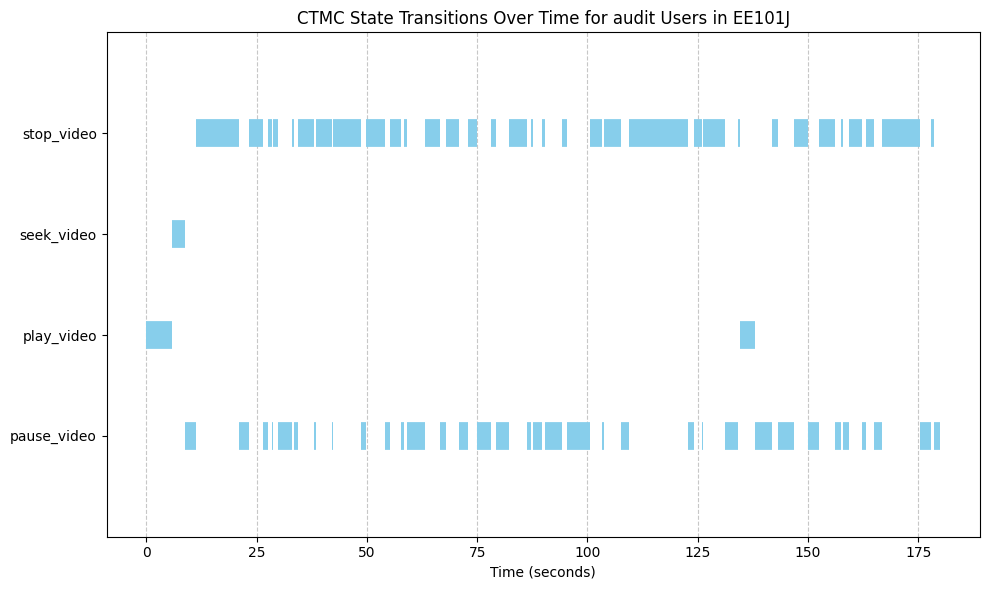

In [21]:
plot_timeline(trajectory)
